In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA
from utils import *


#change directory to save output here
directory = r"D:\Users\Nick\Desktop\Everything\Uni\Honours Project\Plots\IrisExamples/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))

iris=datasets.load_iris()
X=iris.data[:,]
y=iris.target


C:\Users\nickb\AppData\Local\Temp/ipykernel_1424/2122263311.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(directory))


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1, stratify =y)
#split training set 70:30, stratify so each sets have same proportion of class labels"

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train) #estimates sample mean and std for each feature
X_train_std = sc.transform(X_train) #standardises data using estimated parameters
X_test_std = sc.transform(X_test)
svc = svm.SVC(kernel = "linear",C=1).fit(X_train_std,y_train)



In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('#ff1500', '#0000ff', '#00ff00')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        if cl == 0:
            label1 = iris.target_names[0]
        if cl == 1:
            label1 = iris.target_names[1]
        if cl == 2:
            label1 = iris.target_names[2]
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=label1)

In [6]:
q=iris.data[0:100,[2,3]]
z=iris.target[:100]
q_train, q_test, z_train, z_test = train_test_split(q,z,test_size=0.3, random_state = 555, stratify =z)
sc.fit(q_train) 
q_train_std = sc.transform(q_train) 
q_test_std = sc.transform(q_test)
svc_2 = svm.SVC(kernel = "linear",C=1,probability=True).fit(q,z)
q_combined_std = np.vstack((q_train_std, q_test_std))
z_combined = np.hstack((z_train, z_test))

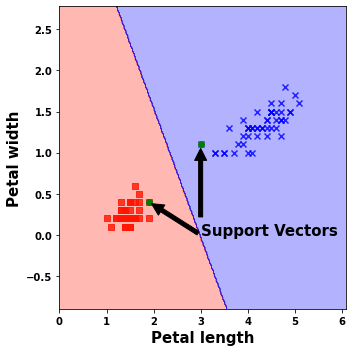

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_decision_regions(X=q,
                      y=z,
                      classifier=svc_2,
                      test_idx=range(105, 150))
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)

t=q[98]
p=q[44]
ax.annotate("Support Vectors",xy=(t[0],t[1]),xytext=(3,0),fontsize=15,arrowprops=dict(facecolor="black",shrink=0.05))
ax.annotate("",xy=(p[0],p[1]),xytext=(3,0),arrowprops=dict(facecolor="black",shrink=0.05))
plt.scatter(t[0],t[1],color="green")
plt.scatter(p[0],p[1],color="green")
plt.tight_layout()
plt.savefig("SVM Classifier.pdf",format="pdf",bbox_inches="tight") 
plt.show()

In [8]:
from sklearn import linear_model
reg = linear_model.RidgeClassifier()
reg.fit(q,z)
ppn = linear_model.Perceptron(eta0=0.1,random_state=1)
ppn.fit(q,z)

Perceptron(eta0=0.1, random_state=1)

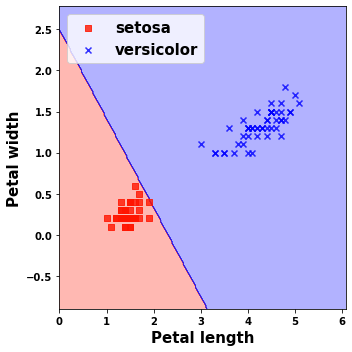

In [9]:
plt.figure(figsize = (5,5))
plot_decision_regions(X=q,
                      y=z,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.legend(loc='upper left',fontsize =15)
plt.tight_layout()
plt.savefig("BadLinEG.pdf",format="pdf",bbox_inches="tight") 
plt.show()

In [10]:
X2=iris.data[50:150,[0,1]]
y2=iris.target[50:150]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state = 555, stratify =y2)
sc.fit(X2_train) 
X2_train_std = sc.transform(X2_train) 
X2_test_std = sc.transform(X2_test)

In [11]:
svc_new = svm.SVC(kernel = "linear",C=1,probability=True).fit(X2_train_std,y2_train)


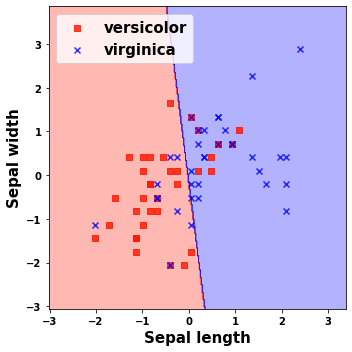

In [13]:
plt.figure(figsize = (5,5))
plot_decision_regions(X=X2_train_std,
                      y=y2_train,
                      classifier=svc_new,
                      test_idx=range(105, 150))
plt.xlabel('Sepal length',fontsize=15)
plt.ylabel('Sepal width',fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.show
plt.savefig("irisnonsep.pdf",format="pdf",bbox_inches="tight")